<a href="https://colab.research.google.com/github/ndegwaanth/Time_Series_Analysis/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [165]:
from statsmodels.tsa import arima
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import calendar

In [245]:
df = pd.read_csv('/content/New-Online_Retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,555200,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-06-01 12:05:00,0.85,17315.0,United Kingdom
1,554974,21128,GOLD FISHING GNOME,4,2011-05-27 17:14:00,6.95,14031.0,United Kingdom
2,550972,21086,SET/6 RED SPOTTY PAPER CUPS,4,2011-04-21 17:05:00,0.65,14031.0,United Kingdom
3,576652,22812,PACK 3 BOXES CHRISTMAS PANETTONE,3,2011-11-16 10:39:00,1.95,17198.0,United Kingdom
4,546157,22180,RETROSPOT LAMP,2,2011-03-10 08:40:00,9.95,13502.0,United Kingdom


In [246]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,3
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,514
Country,0


In [248]:
df.drop(columns=['CustomerID', 'Description'], inplace=True)

KeyError: "['CustomerID', 'Description'] not found in axis"

In [249]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Quantity,0
InvoiceDate,0
UnitPrice,0
Country,0


In [250]:
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Quantity,0
InvoiceDate,0
UnitPrice,0
Country,0


In [251]:
df.describe()

,Quantity,UnitPrice
count,2000.000000,2000.000000
mean,8.855000,3.579020
std,45.034587,8.461268
min,-1350.000000,0.000000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,12.000000,4.130000
max,1000.000000,227.990000


In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    2000 non-null   object 
 1   StockCode    2000 non-null   object 
 2   Quantity     2000 non-null   int64  
 3   InvoiceDate  2000 non-null   object 
 4   UnitPrice    2000 non-null   float64
 5   Country      2000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 93.9+ KB


In [253]:
df.duplicated().sum()

0

In [254]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'Country'],
      dtype='object')

In [255]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [256]:
df.InvoiceDate

,InvoiceDate
0,2011-06-01 12:05:00
1,2011-05-27 17:14:00
2,2011-04-21 17:05:00
3,2011-11-16 10:39:00
4,2011-03-10 08:40:00
...,...
1995,2011-06-02 17:41:00
1996,2011-10-07 11:26:00
1997,2011-09-27 10:52:00
1998,2011-11-30 17:37:00


In [257]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year

df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Country,Sales,Month,Year
0,555200,71459,24,2011-06-01 12:05:00,0.85,United Kingdom,20.40,6,2011
1,554974,21128,4,2011-05-27 17:14:00,6.95,United Kingdom,27.80,5,2011
2,550972,21086,4,2011-04-21 17:05:00,0.65,United Kingdom,2.60,4,2011
3,576652,22812,3,2011-11-16 10:39:00,1.95,United Kingdom,5.85,11,2011
4,546157,22180,2,2011-03-10 08:40:00,9.95,United Kingdom,19.90,3,2011


In [258]:
# df = df.drop(columns=['InvoiceDate'])
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Country,Sales,Month,Year
0,555200,71459,24,2011-06-01 12:05:00,0.85,United Kingdom,20.40,6,2011
1,554974,21128,4,2011-05-27 17:14:00,6.95,United Kingdom,27.80,5,2011
2,550972,21086,4,2011-04-21 17:05:00,0.65,United Kingdom,2.60,4,2011
3,576652,22812,3,2011-11-16 10:39:00,1.95,United Kingdom,5.85,11,2011
4,546157,22180,2,2011-03-10 08:40:00,9.95,United Kingdom,19.90,3,2011


In [259]:
df['Year'].unique()

array([2011, 2010], dtype=int32)

<Axes: ylabel='Sales'>

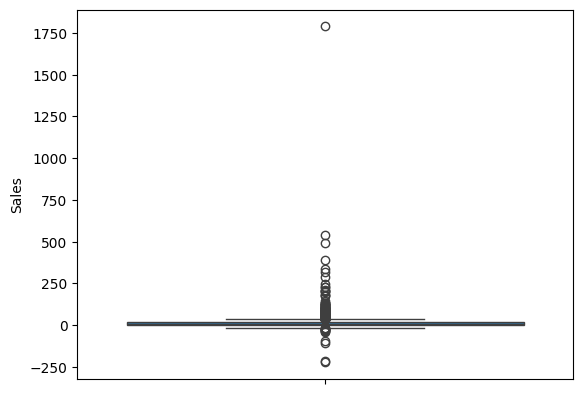

In [260]:
sns.boxplot(df['Sales'])

In [265]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df = df[(df['Sales'] > lower_bound) & (df['Sales'] < upper_bound)]

In [262]:
df['Sales']

,Sales
0,20.40
1,27.80
2,2.60
3,5.85
4,19.90
...,...
1995,3.75
1996,10.79
1997,16.63
1998,3.75


<Axes: ylabel='Sales'>

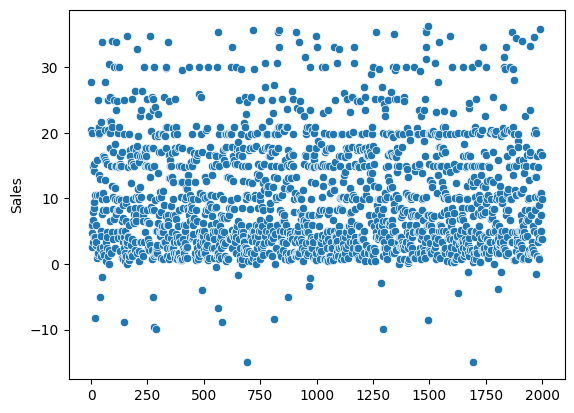

In [266]:
sns.scatterplot( df['Sales'])

<Axes: ylabel='Sales'>

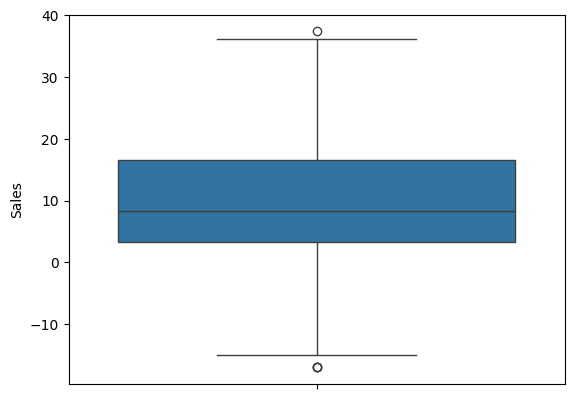

In [184]:
sns.boxplot(df['Sales'])

In [267]:
df['Month_name'] = df['Month'].apply(lambda x: calendar.month_name[x])
df['Month_name'] = df['Month_name'].astype('category')

df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Country,Sales,Month,Year,Month_name
0,555200,71459,24,2011-06-01 12:05:00,0.85,United Kingdom,20.40,6,2011,June
1,554974,21128,4,2011-05-27 17:14:00,6.95,United Kingdom,27.80,5,2011,May
2,550972,21086,4,2011-04-21 17:05:00,0.65,United Kingdom,2.60,4,2011,April
3,576652,22812,3,2011-11-16 10:39:00,1.95,United Kingdom,5.85,11,2011,November
4,546157,22180,2,2011-03-10 08:40:00,9.95,United Kingdom,19.90,3,2011,March


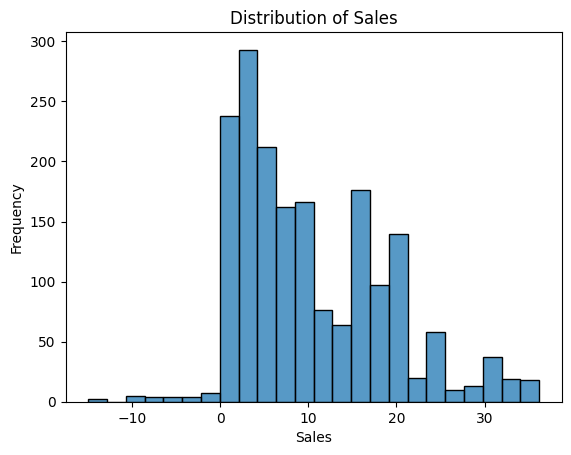

In [268]:
sns.histplot(df['Sales'])
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

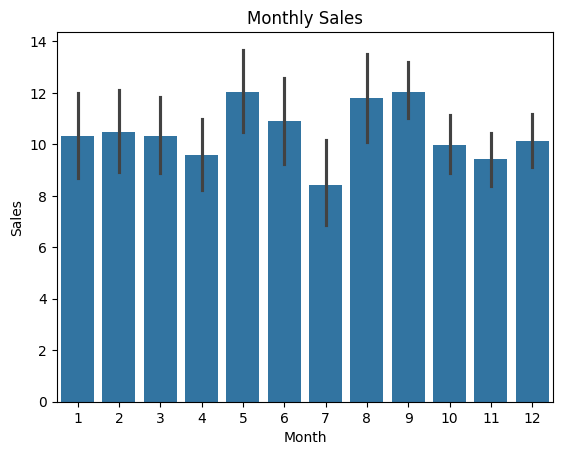

In [269]:
sns.barplot(x='Month', y='Sales', data=df)
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

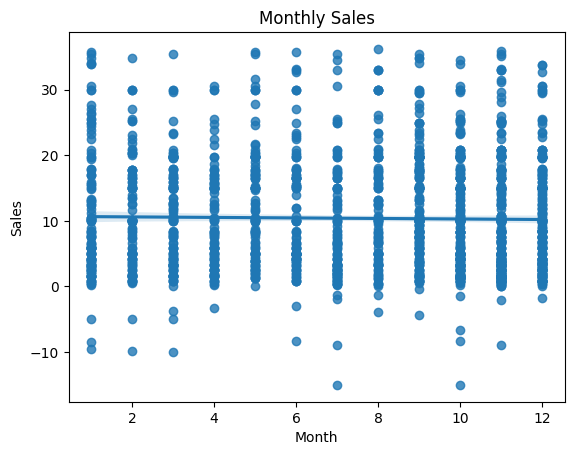

In [270]:
sns.regplot(x='Month', y='Sales', data=df)
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [189]:
index_df = df.set_index('InvoiceDate')
index_df.head()

,InvoiceNo,StockCode,Quantity,UnitPrice,Country,Sales,Month,Year,Month_name
InvoiceDate,,,,,,,,,
2011-06-01 12:05:00,555200,71459,24,0.85,United Kingdom,20.40,6,2011,June
2011-05-27 17:14:00,554974,21128,4,6.95,United Kingdom,27.80,5,2011,May
2011-04-21 17:05:00,550972,21086,4,0.65,United Kingdom,2.60,4,2011,April
2011-11-16 10:39:00,576652,22812,3,1.95,United Kingdom,5.85,11,2011,November
2011-03-10 08:40:00,546157,22180,2,9.95,United Kingdom,19.90,3,2011,March


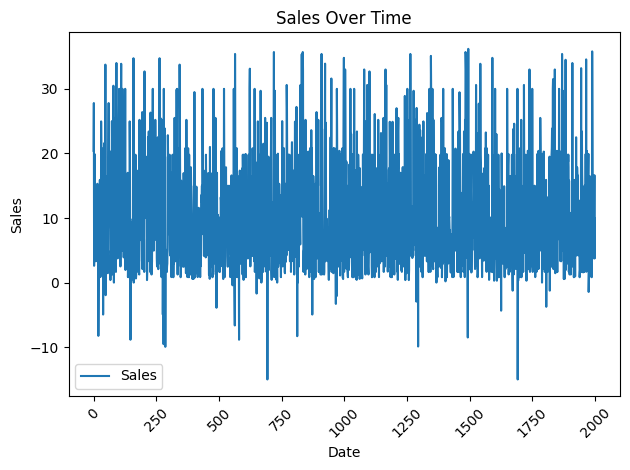

In [271]:
df.Sales.plot()
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(loc="best")
plt.tight_layout()

In [272]:
index_df = df[['InvoiceDate', 'Sales']]
index_df.head()

,InvoiceDate,Sales
0,2011-06-01 12:05:00,20.40
1,2011-05-27 17:14:00,27.80
2,2011-04-21 17:05:00,2.60
3,2011-11-16 10:39:00,5.85
4,2011-03-10 08:40:00,19.90


In [273]:
index_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1825 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceDate  1825 non-null   datetime64[ns]
 1   Sales        1825 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 42.8 KB


In [274]:
index_df['Time'] = index_df['InvoiceDate'].astype(str).str.split().str[0]
index_df.head()

,InvoiceDate,Sales,Time
0,2011-06-01 12:05:00,20.40,2011-06-01
1,2011-05-27 17:14:00,27.80,2011-05-27
2,2011-04-21 17:05:00,2.60,2011-04-21
3,2011-11-16 10:39:00,5.85,2011-11-16
4,2011-03-10 08:40:00,19.90,2011-03-10


In [275]:
index_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1825 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceDate  1825 non-null   datetime64[ns]
 1   Sales        1825 non-null   float64       
 2   Time         1825 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 121.6+ KB


In [276]:
index_df = index_df.set_index(index_df['Time'])
index_df.head()

,InvoiceDate,Sales,Time
Time,,,
2011-06-01,2011-06-01 12:05:00,20.40,2011-06-01
2011-05-27,2011-05-27 17:14:00,27.80,2011-05-27
2011-04-21,2011-04-21 17:05:00,2.60,2011-04-21
2011-11-16,2011-11-16 10:39:00,5.85,2011-11-16
2011-03-10,2011-03-10 08:40:00,19.90,2011-03-10


In [277]:
index_df.columns

Index(['InvoiceDate', 'Sales', 'Time'], dtype='object')

In [278]:
index_df = index_df.drop(columns=['InvoiceDate', 'Time'])
index_df.head()

,Sales
Time,
2011-06-01,20.40
2011-05-27,27.80
2011-04-21,2.60
2011-11-16,5.85
2011-03-10,19.90


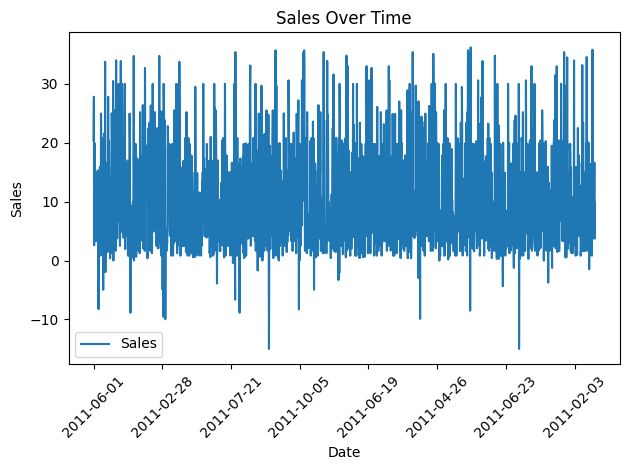

In [279]:
index_df.plot()
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(loc="best")
plt.tight_layout()

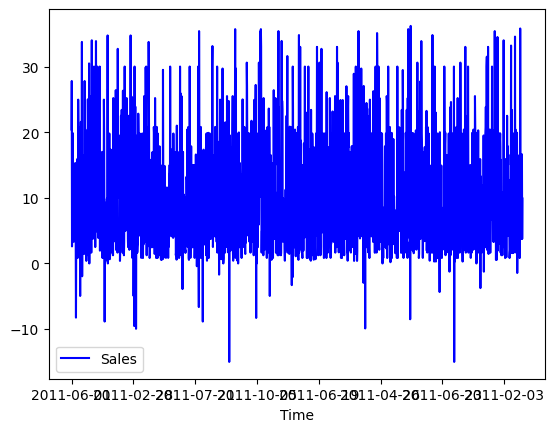

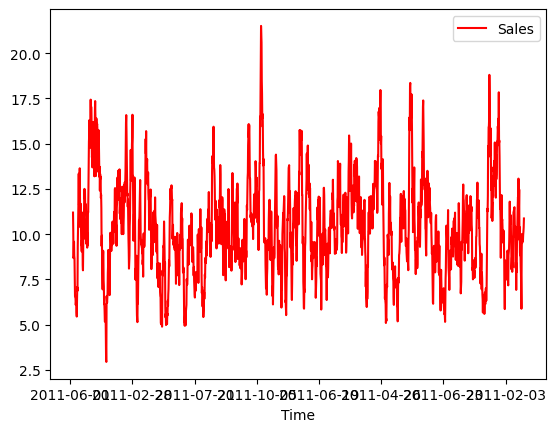

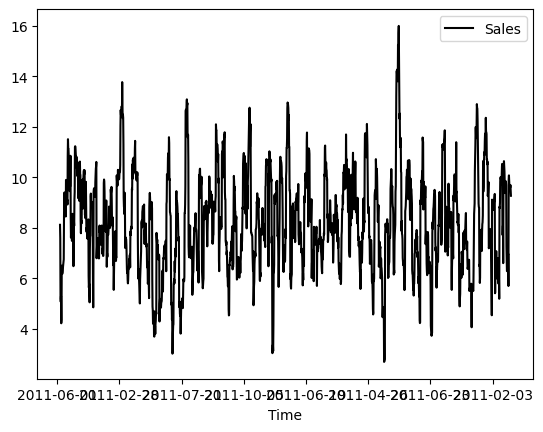

In [280]:
# cheking for the stationarity using the rolling statistics
rolmean = index_df.rolling(window=12).mean()
rolstd = index_df.rolling(window=12).std()


index_df.plot(color='blue', label='Original')
rolmean.plot(color='red', label='Rolling Mean')
rolstd.plot(color='black', label='Rolling Std')
plt.legend(loc='best')

In [281]:
# Using Dicker fuller test for stationarity
from statsmodels.tsa.stattools import adfuller


adf_test = adfuller(index_df['Sales'], autolag='AIC')

adf_output = pd.Series(adf_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_test[4].items():
    adf_output['Critical Value (%s)' % key] = value
adf_output

,0
Test Statistic,-42.411706
p-value,0.000000
#Lags Used,0.000000
Number of Observations Used,1824.000000
Critical Value (1%),-3.433940
Critical Value (5%),-2.863126
Critical Value (10%),-2.567614


In [282]:
# Estimation the trend
index_df_log = np.log(index_df['Sales'])
index_df_log

,Sales
Time,
2011-06-01,3.015535
2011-05-27,3.325036
2011-04-21,0.955511
2011-11-16,1.766442
2011-03-10,2.990720
...,...
2011-06-02,1.321756
2011-10-07,2.378620
2011-09-27,2.811208


<Figure size 1500x1000 with 0 Axes>

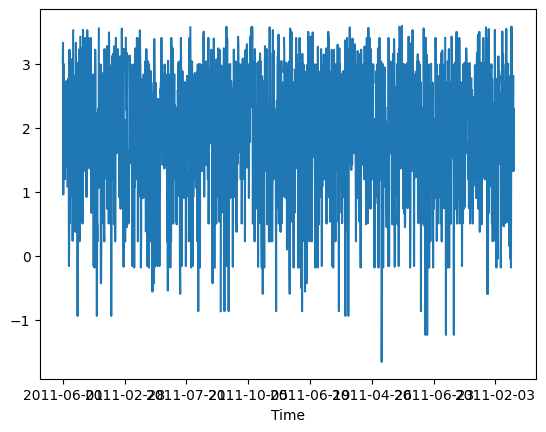

<Figure size 1500x1000 with 0 Axes>

In [283]:
index_df_log.plot()
plt.figure(figsize=(15, 10))

<Axes: xlabel='Time'>

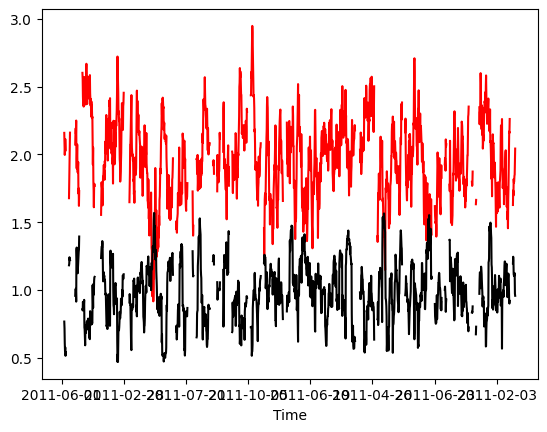

In [284]:
# Moving average
moving_avg = index_df_log.rolling(window=12).mean()
movingSTD = index_df_log.rolling(window=12).std()

moving_avg.plot(color='red')
movingSTD.plot(color='black')
# index_df_log.plot(color='blue')

In [285]:
index_df.head()

,Sales
Time,
2011-06-01,20.40
2011-05-27,27.80
2011-04-21,2.60
2011-11-16,5.85
2011-03-10,19.90


In [286]:
index_df_logM_diff = index_df_log - moving_avg
index_df_logM_diff.dropna(inplace=True)
index_df_logM_diff

,Sales
Time,
2011-10-30,0.495939
2011-05-05,0.054312
2011-08-19,0.253084
2011-01-07,-0.634317
2011-03-10,0.614701
...,...
2011-06-02,-0.478092
2011-10-07,0.537810
2011-09-27,0.960401


In [287]:
index_df_log.dropna(inplace=True)
index_df_log.isnull().sum()

0

In [288]:
index_df_log.isna().sum()

0

In [289]:
index_df_log = index_df_log.interpolate(method='linear')

# index_df_log = index_df_log.fillna(method='bfill')
index_df_log.fillna(method='bfill')

,Sales
Time,
2011-06-01,3.015535
2011-05-27,3.325036
2011-04-21,0.955511
2011-11-16,1.766442
2011-03-10,2.990720
...,...
2011-06-02,1.321756
2011-10-07,2.378620
2011-09-27,2.811208


In [290]:
index_df_log.head()

,Sales
Time,
2011-06-01,3.015535
2011-05-27,3.325036
2011-04-21,0.955511
2011-11-16,1.766442
2011-03-10,2.990720


In [243]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure all missing values are filled using forward fill and backward fill
index_df_log = index_df_log.fillna(method='ffill')
index_df_log = index_df_log.fillna(method='bfill')  # Fill any remaining NaNs with backward fill

decomposition = seasonal_decompose(index_df_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(15, 10))
plt.subplot(411)
plt.plot(index_df_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')

ValueError: This function does not handle missing values